# **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Imports Libraries and Tools**


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json

# **Load Dataset**

In [5]:
# Path to your dataset in Drive
DATASET_PATH = '/content/drive/MyDrive/chest_xray'

# Image and training settings
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 10

# **Create Data Generators**


In [6]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=15,
                               zoom_range=0.1,
                               width_shift_range=0.1,
                               height_shift_range=0.1)

val_test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    os.path.join(DATASET_PATH, 'train'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = val_test_gen.flow_from_directory(
    os.path.join(DATASET_PATH, 'val'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_data = val_test_gen.flow_from_directory(
    os.path.join(DATASET_PATH, 'test'),
    target_size=IMAGE_SIZE,
    batch_size=1,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# **Build and Train the CNN Model**

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1121s 7s/step - accuracy: 0.7756 - loss: 0.4991 - val_accuracy: 0.6250 - val_loss: 0.8782
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 541ms/step - accuracy: 0.8959 - loss: 0.2563 - val_accuracy: 0.8750 - val_loss: 0.4289
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 532ms/step - accuracy: 0.9144 - loss: 0.2049 - val_accuracy: 0.6875 - val_loss: 0.4594
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 532ms/step - accuracy: 0.9243 - loss: 0.1903 - val_accuracy: 0.8125 - val_loss: 0.4048
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 536ms/step - accuracy: 0.9347 - loss: 0.1670 - val_accuracy: 0.9375 - val_loss: 0.2353
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 533ms/step - accuracy: 0.9354 - loss: 0.1663 - val_accuracy: 0.6875 - val_loss: 0.8509
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 541ms/step - accuracy: 0.9459 - loss: 0.1484 - val_accuracy: 0.8750 - val_loss: 0.1984
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 541ms/step - accuracy: 0.9368 - loss: 0

# **Evaluate and Visualize Results**

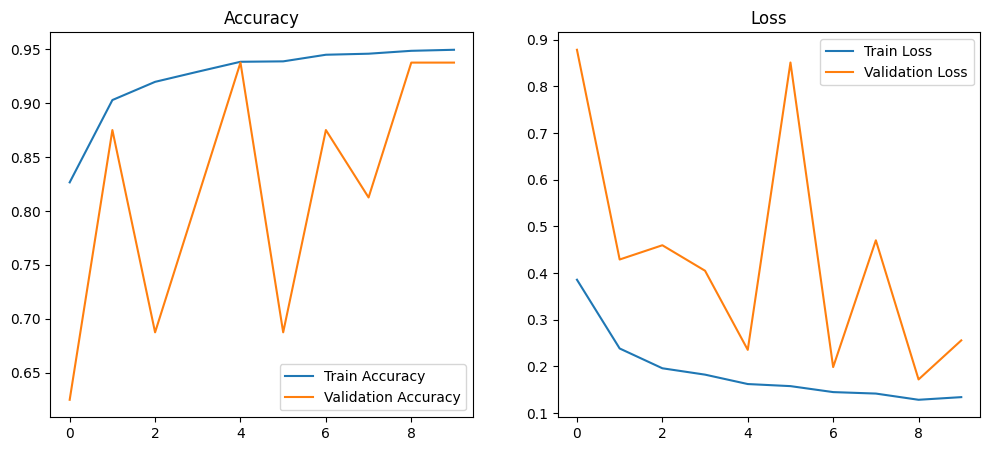

624/624 ━━━━━━━━━━━━━━━━━━━━ 464s 744ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.62      0.76       234
           1       0.81      0.99      0.89       390

    accuracy                           0.85       624
   macro avg       0.90      0.81      0.83       624
weighted avg       0.88      0.85      0.85       624



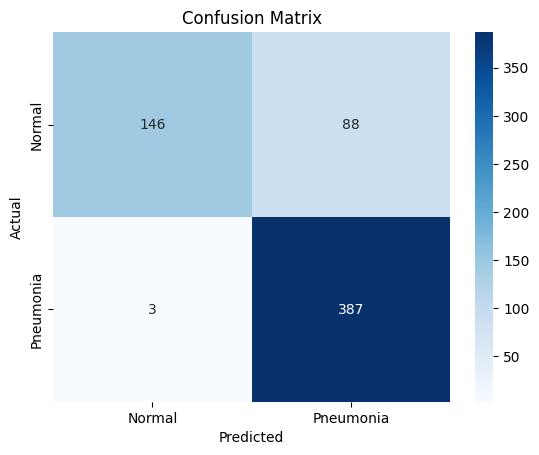

In [8]:
# Accuracy and loss curves
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Evaluate on test set
predictions = model.predict(test_data)
y_pred = (predictions > 0.5).astype(int).flatten()
y_true = test_data.classes

print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Save Model & Class Labels to Drive**

In [10]:
# Save model
model.save('/content/drive/MyDrive/lung_model.h5')

# Save class mapping
with open('/content/drive/MyDrive/lung_class_indices.json', 'w') as f:
    json.dump(train_data.class_indices, f)


In [17]:
# Example usage (for a NORMAL chest X-ray)
image_path = '/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'  # Update with your actual image path
predict_lung_image(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for /content/drive/MyDrive/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg: Pneumonia (0.9971)


In [25]:
# prompt: I want the pic also of the xray and confidence percetage

def predict_lung_image(image_path, model):
    """
    Loads an image, preprocesses it, makes a prediction using the trained model,
    and displays the image with its predicted class and confidence.

    Args:
        image_path (str): The path to the image file.
        model (tensorflow.keras.Model): The trained Keras model.
    """
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    img_array /= 255.0  # Rescale the image

    prediction = model.predict(img_array)
    confidence = prediction[0][0]

    # Get class labels
    class_indices = train_data.class_indices
    classes = list(class_indices.keys())
    predicted_class_index = int(round(confidence)) # Round prediction to 0 or 1
    predicted_class = classes[predicted_class_index]

    # Adjust confidence for display (0-100%) and interpret based on class
    if predicted_class_index == 0: # Normal
        display_confidence = (1 - confidence) * 100
    else: # Pneumonia
        display_confidence = confidence * 100
# prompt: I want the pic also of the xray and confidence percetage

def predict_lung_image(image_path, model):
    """
    Loads an image, preprocesses it, makes a prediction using the trained model,
    and displays the image with its predicted class and confidence.

    Args:
        image_path (str): The path to the image file.
        model (tensorflow.keras.Model): The trained Keras model.
    """
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    img_array /= 255.0  # Rescale the image

    prediction = model.predict(img_array)
    confidence = prediction[0][0]

    # Get class labels
    class_indices = train_data.class_indices
    classes = list(class_indices.keys())
    predicted_class_index = int(round(confidence)) # Round prediction to 0 or 1
    predicted_class = classes[predicted_class_index]

    # Adjust confidence for display (0-100%) and interpret based on class
    if predicted_class_index == 0: # Normal
        display_confidence = (1 - confidence) * 100
    else: # Pneumonia
        display_confidence = confidence * 100

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} (Confidence: {display_confidence:.2f}%)")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


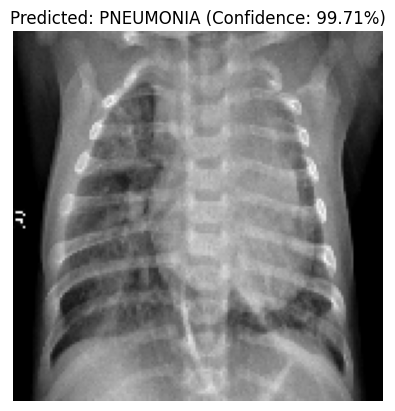

In [26]:
# Example usage (for a NORMAL chest X-ray)
image_path = '/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'  # Update with your actual image path
predict_lung_image(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


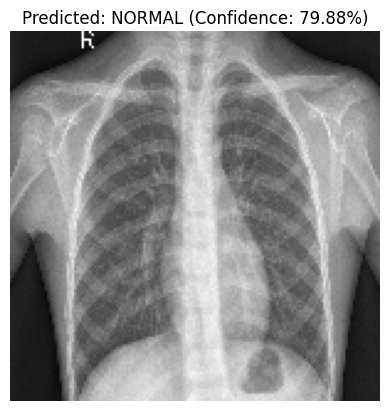

In [27]:
# Example usage (for a NORMAL chest X-ray)
image_path = '/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0001-0001.jpeg'  # Update with your actual image path
predict_lung_image(image_path, model)